In [52]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

%matplotlib inline

In [53]:
def flip_coin():
    #HEADS = 1; TAILS = 0
    return random.randint(0, 1)

In [54]:
def simulate_flipping(flip_exponent = 16):
    heads_record = []
    heads_total, flip_count = 0, 0
    
    while flip_count <= (2 ** flip_exponent):
        heads_total += flip_coin()
        flip_count += 1
        
        if flip_count in [2 ** x for x in range(0, flip_exponent + 1)]:
            heads_record.append(heads_total)
    
    return heads_record    

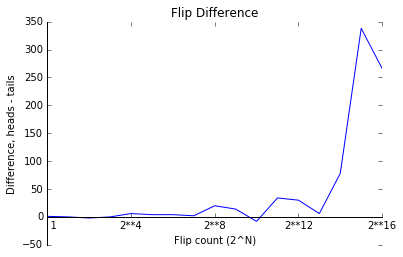

In [57]:
heads = simulate_flipping()
tails = [2**idx - heads[idx] for idx in range(0, len(heads))]

x = [0, 4, 8, 12, 16]
y = [x-y for x,y in zip(heads, tails)]
xlabels = ['    1', '2**4', '2**8', '2**12', '2**16']
plt.plot(y)
plt.xticks(x, xlabels)
plt.xlabel('Flip count (2^N)')
plt.ylabel('Difference, heads - tails')
plt.title('Flip Difference')
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0))
plt.show()

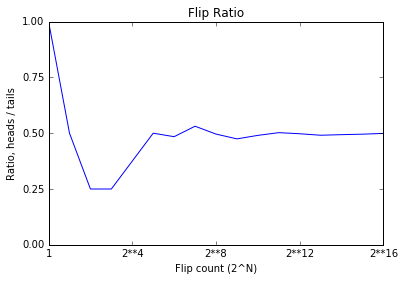

In [58]:
heads = simulate_flipping()
tails = [2**idx - heads[idx] for idx in range(0, len(heads))]

x = [0, 4, 8, 12, 16]
xlabels = ['1', '2**4', '2**8', '2**12', '2**16']
y = [x/(x+y) for x,y in zip(heads, tails)]
ytic = [0, 0.25, 0.50, 0.75, 1.00]

plt.plot(y, color='blue', alpha=1.00)
plt.xticks(x, xlabels)
plt.yticks(ytic)
plt.xlabel('Flip count (2^N)')
plt.ylabel('Ratio, heads / tails')
plt.title('Flip Ratio')
plt.show()

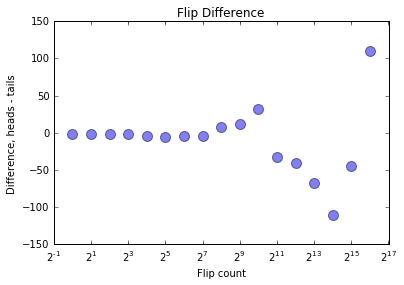

In [59]:
heads = simulate_flipping()
tails = [2**idx - heads[idx] for idx in range(0, len(heads))]

X = [2 ** x for x in range(0, 17)]
Y = [x-y for x,y in zip(heads, tails)]

plt.scatter(X, Y, s=100, alpha=.5)

plt.xticks((x))
plt.xscale('log', basex=2)

plt.xlabel('Flip count')
plt.ylabel('Difference, heads - tails')
plt.title('Flip Difference')

plt.show()

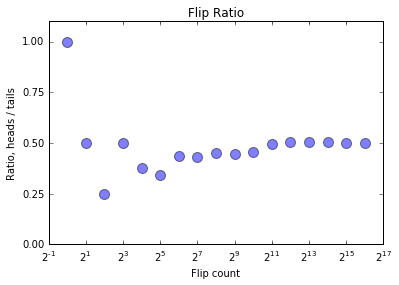

In [60]:
heads = simulate_flipping()
tails = [2**idx - heads[idx] for idx in range(0, len(heads))]

X = [2 ** x for x in range(0, 17)]
Y = [x/(x+y) for x,y in zip(heads, tails)]
ytic = [0, 0.25, 0.50, 0.75, 1.00]

plt.scatter(X, Y, s=100, alpha=.5)

plt.xticks((x))
plt.xscale('log', basex=2)
plt.yticks(ytic)
plt.xlabel('Flip count')
plt.ylabel('Ratio, heads / tails')
plt.title('Flip Ratio')

plt.show()

In [93]:
def simulate_twenty_runs():
    heads = simulate_flipping()
    htemp = simulate_flipping()
    heads = [list(i) for i in zip(heads, htemp)]
    count = 2
    while count < 20:
        htemp = simulate_flipping()
        for idx,val in enumerate(htemp):
            heads[idx].append(val)
        count += 1
    return heads

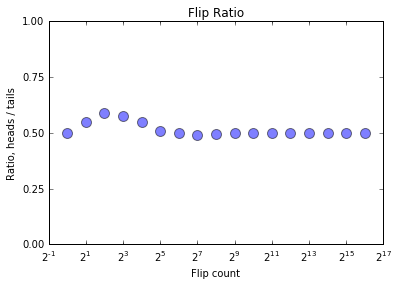

In [95]:
temp = simulate_twenty_runs()
heads = [sum(temp[idx]) for idx in range(0, len(temp))]

h_ave = [heads[idx]/20 for idx in range(0, len(heads))]
t_ave = [2**idx - h_ave[idx] for idx in range(0, len(h_ave))]

X = [2 ** x for x in range(0, 17)]
Y = [(head / (head + tail)) for head, tail in zip(h_ave, t_ave)]
ytic = [0, 0.25, 0.50, 0.75, 1.00]

plt.scatter(X, Y, s=100, alpha=.5)

plt.xticks((x))
plt.xscale('log', basex=2)
plt.yticks(ytic)
plt.xlabel('Flip count')
plt.ylabel('Ratio, heads / tails')
plt.title('Flip Ratio')

plt.show()

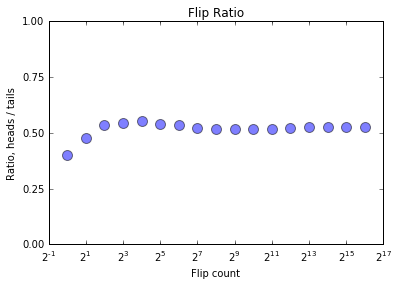

In [63]:
heads = simulate_twenty_runs()
tails = [2**idx - heads[idx] for idx in range(0, len(heads))]

h_stddev = st.stddev(heads)
t_stddev = st.stddev(tails)

# h_ave = [heads[idx]/20 for idx in range(0, len(heads))]
# t_ave = [2**idx - h_ave[idx] for idx in range(0, len(h_ave))]

# h_var = [(x-y)**2 for x,y in zip(heads, h_ave)]
# t_var = [(x-y)**2 for x,y in zip(tails, t_ave)]

# h_stddev = 
# t_stddev = 

X = [2 ** x for x in range(0, 17)]
Y = [(head / (head + tail)) for head, tail in zip(h_var, t_var)]
ytic = [0, 0.25, 0.50, 0.75, 1.00]

plt.scatter(X, Y, s=100, alpha=.5)

plt.xticks((x))
plt.xscale('log', basex=2)
plt.yticks(ytic)
plt.xlabel('Flip count')
plt.ylabel('Ratio, heads / tails')
plt.title('Flip Ratio')

plt.show()